In [ ]:
#visualize word embeddings using dimensionality reduction
#analyze cluster, relationships, generate 5 similar words
%pip install gensim numpy matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print("loading pre-trained word vectors")
word_vectors = api.load("word2vec-google-news-300")

loading pre-trained word vectors
[==================================================] 100.0% 1662.8/1662.8MB downloaded



Word relationship: king - man + woman
Most similar words to result(excluding i/p words)
queen : 0.7301
monarch : 0.6455
princess : 0.6156
crown_prince : 0.5819
prince : 0.5777


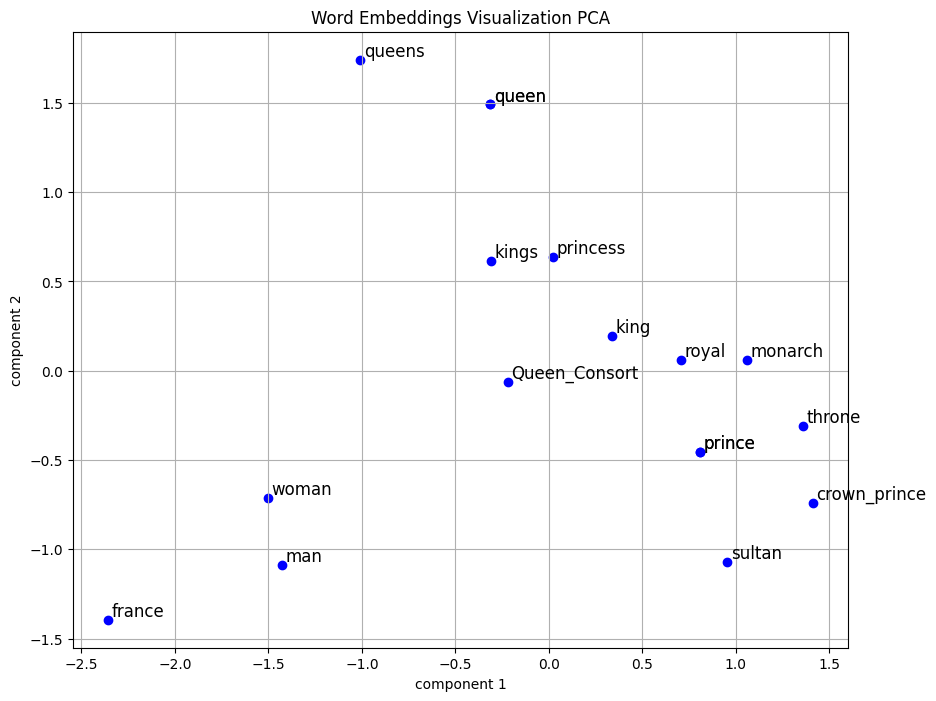

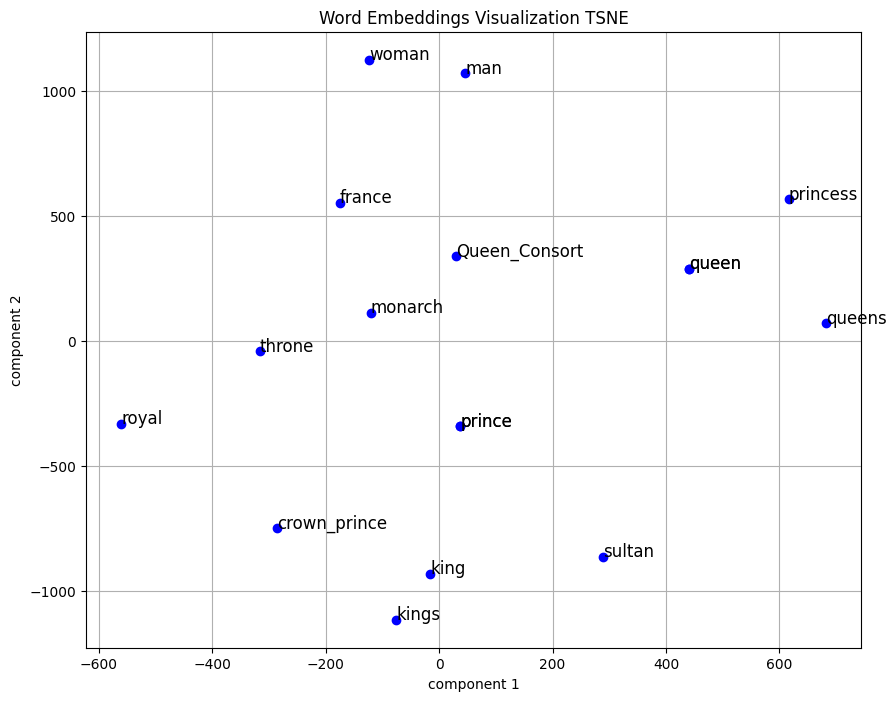

In [ ]:
#to perform vector arithmetic
def explore_word_relationships(word1, word2, word3):
  try:
    result_vector = word_vectors[word1] - word_vectors[word2] + word_vectors[word3]

    #similar words
    similar_words = word_vectors.similar_by_vector(result_vector, topn=10)

    #exclude i/p
    input_words = {word1, word2, word3}
    filtered_words = [(word, similarity) for word, similarity in similar_words if word not in input_words]

    print(f"\nWord relationship: {word1} - {word2} + {word3}")
    print("Most similar words to result(excluding i/p words)")
    for word, similarity in filtered_words[:5]:
      print(f"{word} : {similarity:.4f}")

    return filtered_words
  except KeyError as e:
    print(f"Error {e} not found in vocabulary")
    return []

#to visualize
def visualize_word_embeddings(words, vectors, method = 'pca'):
  if method=='pca':
    reducer = PCA(n_components = 2)
  elif method == 'tsne':
    reducer = TSNE(n_components = 2, random_state = 42, perplexity = 3)
  else:
    raise ValueError("method must be pca or tsne")

  reduced_vectors = reducer.fit_transform(vectors)
  plt.figure(figsize = (10, 8))

  for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o', color='blue')
    plt.text(reduced_vectors[i, 0]+0.02, reduced_vectors[i, 1]+0.02, word, fontsize=12)

  plt.title(f"Word Embeddings Visualization {method.upper()}")
  plt.xlabel("component 1")
  plt.ylabel("component 2")
  plt.grid(True)
  plt.show()

words_to_explore = ["king", "man", "woman", "queen", "france", "prince", "royal", "throne"]
filtered_words = explore_word_relationships("king", "man", "woman")

words_to_visualize = words_to_explore + [word for word, _ in filtered_words]
vectors_to_visualize = np.array([word_vectors[word] for word in words_to_visualize])

visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='pca')
visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='tsne')


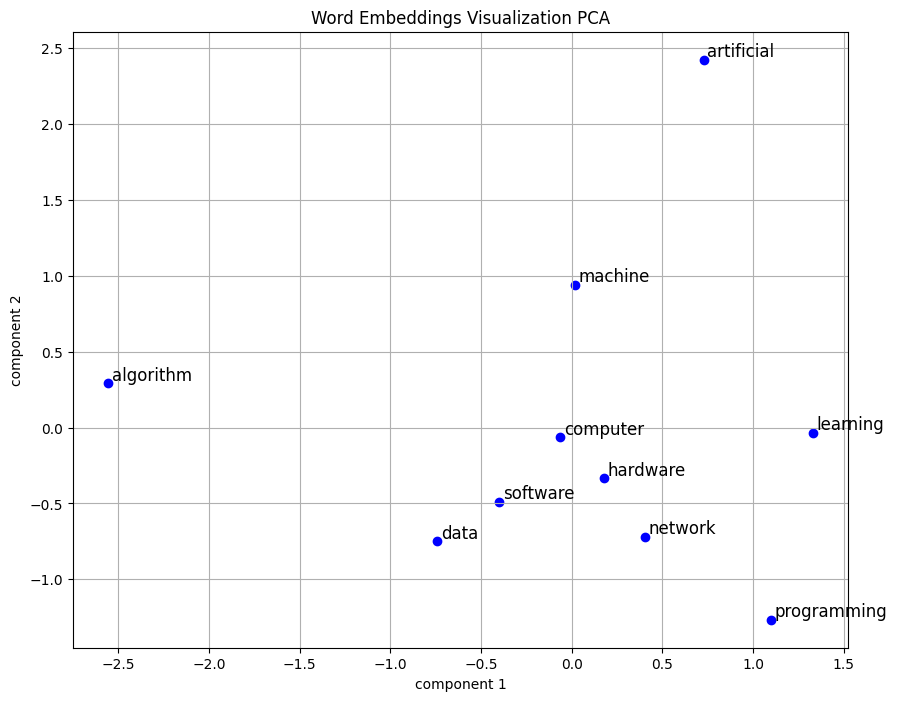

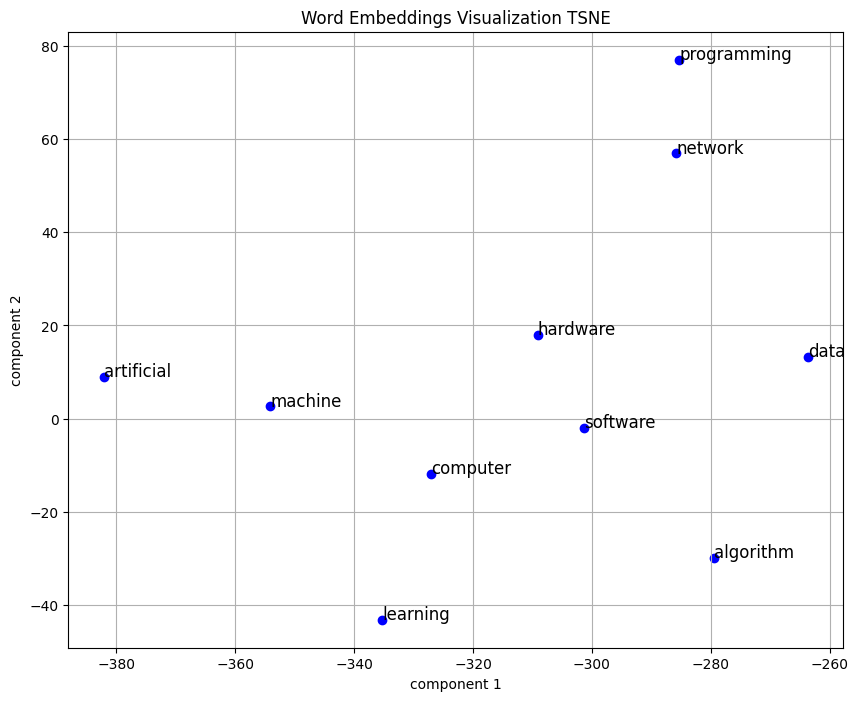


 top 5 semantically similar words to 'computer'
computers : 0.7979
laptop : 0.6640
laptop_computer : 0.6549
Computer : 0.6473
com_puter : 0.6082

 top 5 semantically similar words to 'learning'
teaching : 0.6602
learn : 0.6365
Learning : 0.6208
reteaching : 0.5810
learner_centered : 0.5739


In [ ]:
#2b visualize word embeddings of 10 words from a domain, analyze cluster and relationships
domain_words = ["computer", "software", "hardware", "algorithm", "data", "network", "programming", "machine", "learning", "artificial"]
domain_vectors = np.array([word_vectors[word] for word in domain_words])

#pca , tsne
visualize_word_embeddings(domain_words, domain_vectors, method='pca')
visualize_word_embeddings(domain_words, domain_vectors, method='tsne')

#generate 5 semantically similar words
def generate_similar_words(word):
  try:
    similar_words = word_vectors.most_similar(word, topn=5)
    print(f"\n top 5 semantically similar words to '{word}'")
    for similar_word, similarity in similar_words:
      print(f"{similar_word} : {similarity:.4f}")
  except KeyError as e:
    print(f"Error: {e} not found in vocabulary")

generate_similar_words("computer")
generate_similar_words("learning")

VIVA

----
1. What is the significance of Cohere, LangChain, and Pydantic?

- Cohere: Provides NLP APIs including embeddings, classification, and summarization via LLMs. Used for model inference.

- LangChain: Framework to build applications powered by LLMs. It connects LLMs with tools like memory, APIs, and agents.

- Pydantic: Used for data validation and parsing using Python type hints. Useful in defining schemas and ensuring structured output from LLMs.

----

2. Explain the techniques used in word embeddings.

- Traditional: One-hot encoding, Bag of Words (BoW), TF-IDF.

- Neural: Word2Vec (CBOW, Skip-gram), GloVe (co-occurrence matrix), FastText (subword n-grams), BERT (contextual embeddings).

----

3. Why do we use word embeddings?/ Need for word embeddings.

- To reduce dimensionality and sparsity.

- To capture semantic and syntactic meanings.

- To enable words with similar meanings to have similar representations.

----

4. Discuss the real-world applications of LLMs and their limitations.

- Applications: Chatbots, summarization, code generation, sentiment analysis, content creation.

- Limitations: Bias in training data, hallucination, high computational cost, lack of real-time awareness.

----

5. Which model is used for summarization?

- Pre-trained summarization model from Hugging Face (facebook/bart-large-cnn)

----

6. Explain the BART model in detail.

- BART (Bidirectional and Auto-Regressive Transformer) combines BERT (encoding) and GPT (decoding).

- It is a sequence-to-sequence model used for text generation, summarization, translation, etc.

- Trained by corrupting text and learning to reconstruct it.

----

7. What is sentiment analysis and its applications?

- It is the process of identifying sentiment (positive, negative, neutral) from text.

- Applications: Customer feedback, brand monitoring, political analysis, market research.

----

8. Discuss and explain the significance of the parameter perplexity in t-SNE.

- hyperparameter that defines the effective number of neighbors.

- Controls the balance between local(less perplexity) vs. global(more perplexity) structure.

- Should be less than the number of data points; typical range: 5–50.

----

9. Describe the algorithm (step-by-step, in words) for building an IPC chatbot.

a. Download the Indian Penal Code document.

b. Preprocess and split the document into retrievable chunks.

c. Use embeddings to store the chunks in a vector store.

d. Accept user queries.

e. Retrieve relevant sections using similarity search.

f. Use LLM (via LangChain) to answer based on the retrieved context.

----

10. Discuss PCA and t-SNE.

- PCA: Linear, preserves global variance, faster, used for large datasets.

- t-SNE: Non-linear, preserves local relationships, ideal for visualizing word clusters in small data.

- Used to visualize high-dimensional word embeddings in 2D/3D.

----

11. What are the uses of prompt engineering?

- To control LLM outputs by carefully designing the input prompts.

- Used in chatbots, summarization, translation, data extraction, and few-shot learning.

----